# Objective: 

* To come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.
* Identify which variables are most significant.
* Generate a set of insights and recommendations that will help the bank.
* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not.
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank


# Data:
**BankChurners.csv** - it contains information about bank customer data.

Customer details:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# Loading libraries

In [1283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Loading and exploring the data

Loading the data into python to explore and understand it.

In [1284]:
df = pd.read_csv('BankChurners.csv')

In [1285]:
# copying data to another varaible to avoid any changes to original data
data = df.copy()

### View the first and last 5 rows of the dataset.

In [1286]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [1287]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


### Understand the shape of the dataset.

In [1288]:
data.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns 

### Check the data types of the columns for the dataset.

In [1289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 2 variables with missing values. 
* [Education_Level and Marital_Status]

### Summary of the dataset

In [1290]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127,NaN,NaN,NaN,7.39178e+08,3.69038e+07,7.08082e+08,7.13037e+08,7.17926e+08,7.73144e+08,8.28343e+08
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127,NaN,NaN,NaN,46.326,8.01681,26,41,46,52,73
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127,NaN,NaN,NaN,2.3462,1.29891,0,1,2,3,5
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127,NaN,NaN,NaN,35.9284,7.98642,13,31,36,40,56


* `CLIENTNUM`: The CustomerID attribute does not add any information to our analysis as all the values are unique. There is no association between a person's customer ID and ProdTaken, also it does not provide any general conclusion for future potential travel package customers. We can neglect this information for our model prediction.
* `Attrition_Flag`: This is the dependent variable we are interested in. It is split into 0 and 1 for attrited or exisiting customer.
* `Customer_Age`: Average age of customers is 46 years, age of customers has a wide range from 26 to 73 years. 

In [1291]:
data.drop("CLIENTNUM", axis = 1, inplace = True)

* Dropping CLIENTNUM as there is not much value expected

In [1292]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [1293]:
for i in data:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Customer_Age are :
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Dependent_count are :
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtyp

* We notice several missing values that need to be treated in 2 different columns.
* There are also outliers that will be addressed later in the analysis.
* We notice that for the Income_Category there is a non numerical range of data with 'abc' that will need to be addressed.

In [1294]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [1295]:
data['Attrition_Flag'].replace('Existing Customer',1,regex=True,inplace=True)
data['Attrition_Flag'].replace('Attrited Customer',0,regex=True,inplace=True)

In [1296]:
data['Attrition_Flag'].unique()

array([1, 0], dtype=int64)

* Here we are changing the Attrition_Flag to 0 and 1.
* 0 is Attrited Customer
* 1 is Existing Customer

## EDA

## Univariate analysis

In [1297]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Customer Age

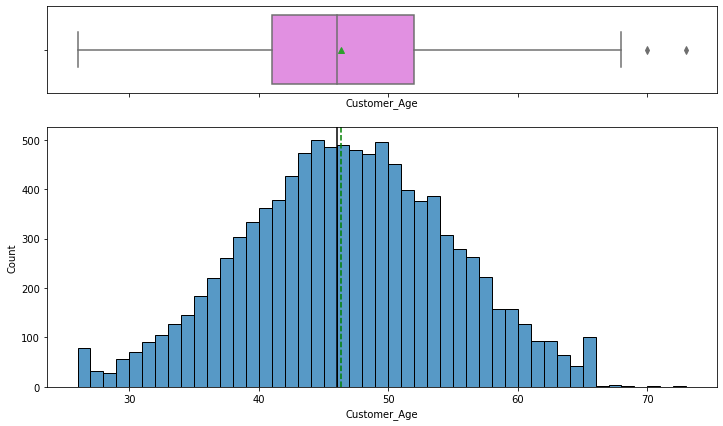

In [1298]:
histogram_boxplot(data, "Customer_Age")

* The distribution of the customer age has a mostly normal distribution. 
* The average customer age is around 46.
* The mean and the median are also close together.

### Observations on Months on Book

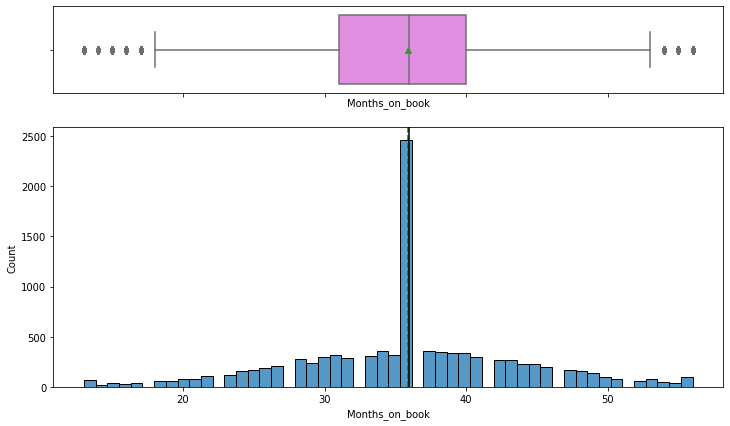

In [1299]:
histogram_boxplot(data, "Months_on_book")

* The distribution of the customer age has a mostly normal distribution. 
* The average number of months on book is 36 months
* The mean and the median are also close together.

### Observations on Credit Limit

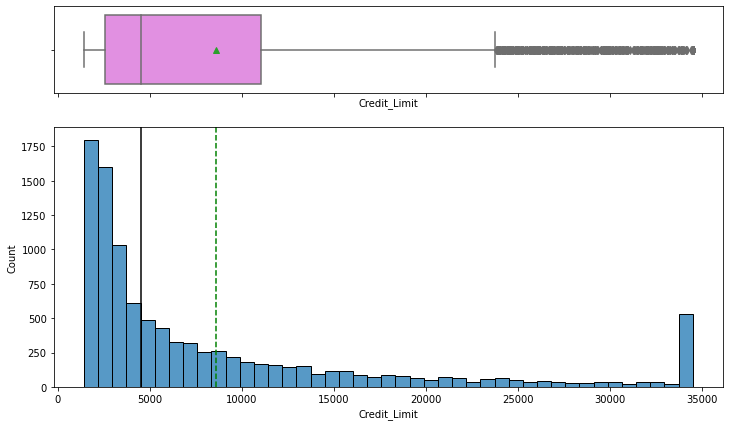

In [1300]:
histogram_boxplot(data, "Credit_Limit")

* The distribution of Credit_Limit is heavily skewed to the right.
* There are outliers to the left of the distribution.

### Observations on Total Revolving Bal

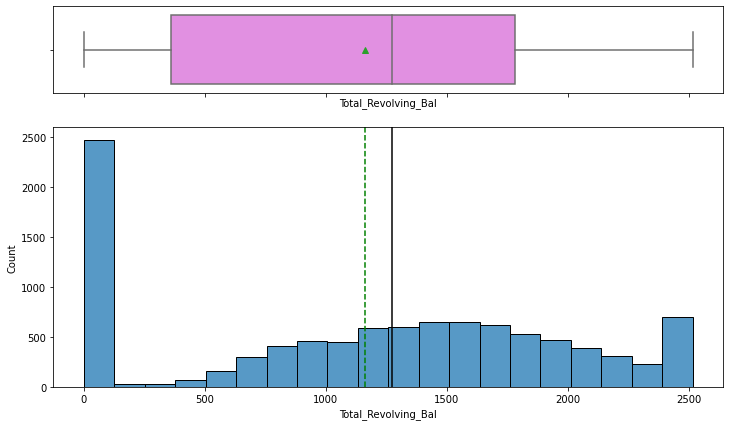

In [1301]:
histogram_boxplot(data, "Total_Revolving_Bal")

* The distribution of the total revolving balance is skewed heavily on both ends.
* A majority of the data is concentrated around 0.

### Observations on Average Open to Buy

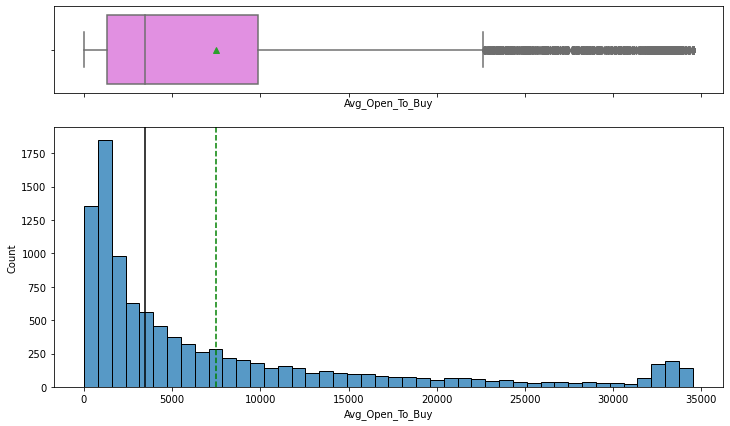

In [1302]:
histogram_boxplot(data, "Avg_Open_To_Buy")

* The distribution of Avg_Open_To_Buy is heavily skewed to the right.
* There are outliers to the left of the distribution.

### Observations on Total Transaction Amount

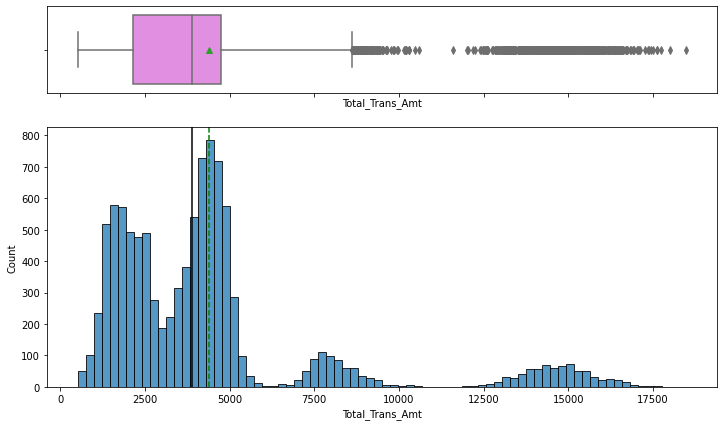

In [1303]:
histogram_boxplot(data, "Total_Trans_Amt")

* The distribution of Total_Trans_Amt appears to be bimodal and heavily skewed to the right.
* There are outliers to the right of the distribution.
* The mean and the median are also close together.

### Observations on Total Transaction Count

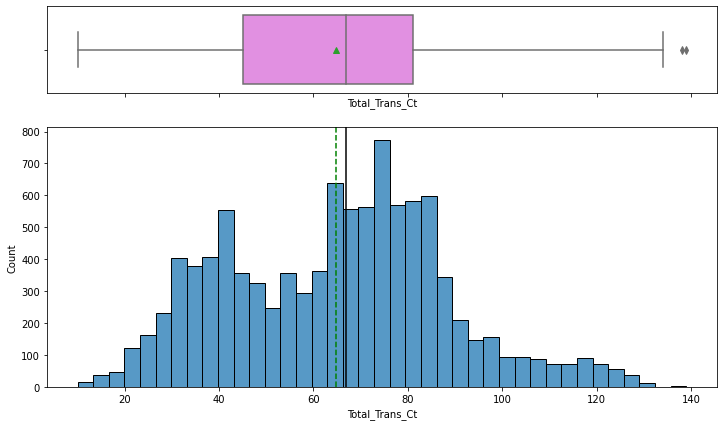

In [1304]:
histogram_boxplot(data, "Total_Trans_Ct")

* The distribution of Total_Trans_Ct also appears to be bimodal.
* There are outliers to the right of the distribution.
* The mean and the median are also close together centered around 70.

### Observations on Total Count Change

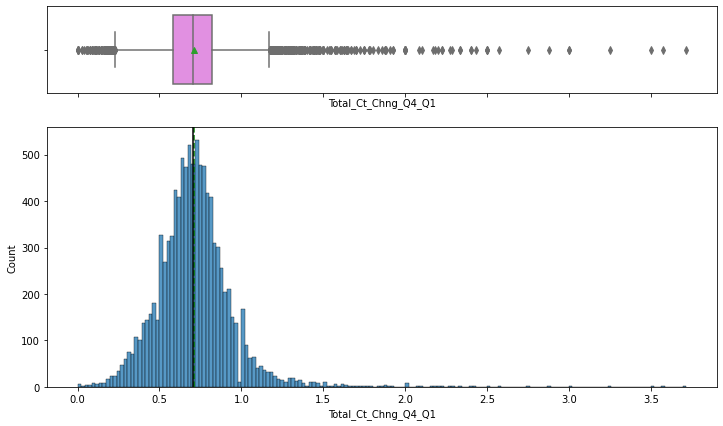

In [1305]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

* The distribution of Total_Ct_Chng_Q4_Q1 is normally distributed.
* There are outliers to the left and right of the distribution.
* The mean and the median are also close together.

### Observations on Total Amount Change

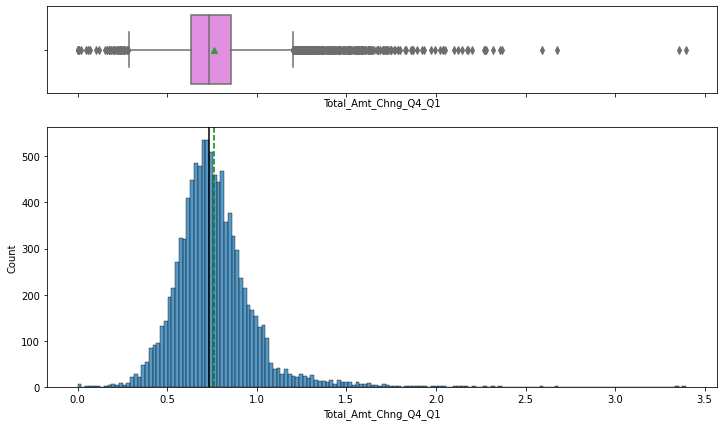

In [1306]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

* The distribution of Total_Amt_Chng_Q4_Q1 is normally distributed.
* There are outliers to the left and right of the distribution.
* The mean and the median are also close together.

### Observations on Average Utilization Ratio

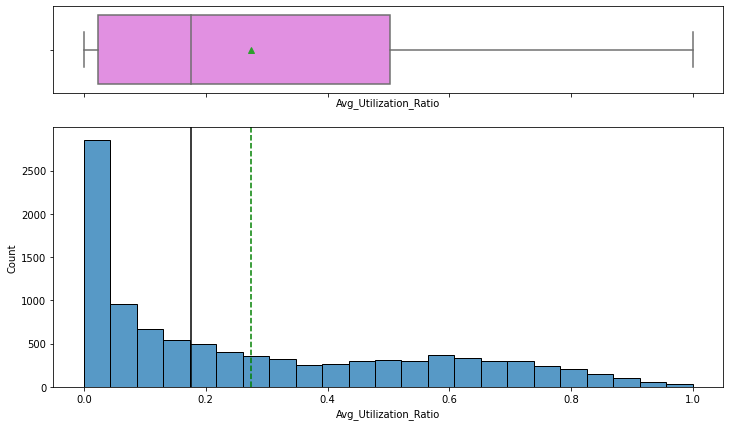

In [1307]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

* The distribution of the Avg_Utilization_Ratio is skewed heavily to the right.
* A majority of the data is concentrated around 0.

In [1308]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Attrition Flag

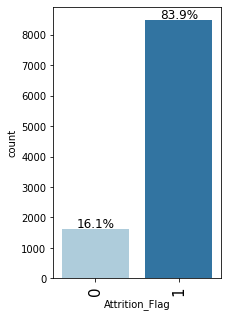

In [1309]:
labeled_barplot(data, "Attrition_Flag", perc=True)

- There are approx 16.1% of customers who renounced their credit cards. 

### Observations on Gender

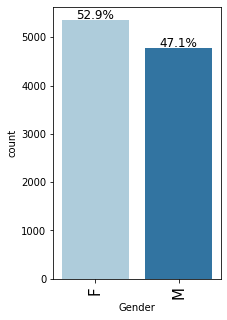

In [1310]:
labeled_barplot(data, "Gender", perc=True)

- More customers in this dataset are female at 52.9%. 
- This is interesting to consider in the demographics.

### Observations on Dependent Count

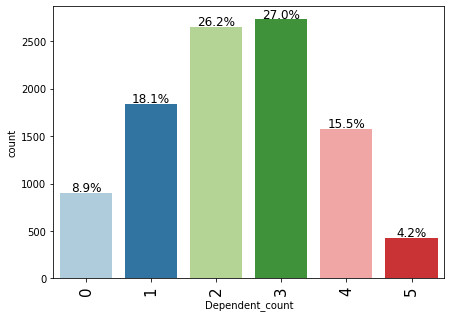

In [1311]:
labeled_barplot(data, "Dependent_count", perc=True)

- Most customers have three dependents at 27% with 2 dependents being a close second at 26.2%. 
- This shows most customers have a small family.

### Observations on Education Level

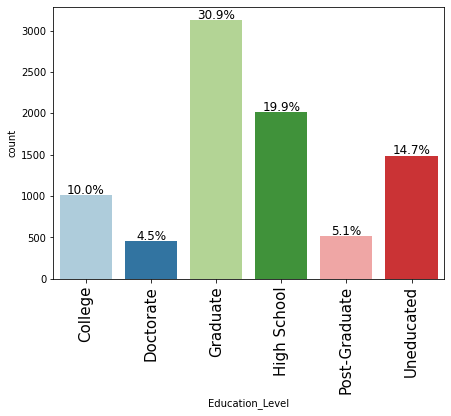

In [1312]:
labeled_barplot(data, "Education_Level", perc=True)

- A majority of customers have a graduate level of education at 30.9%. 
- This is interesting to target for potential customers.

### Observations on Marital Status

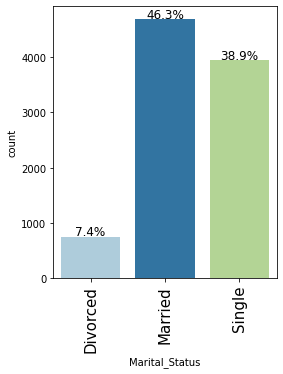

In [1313]:
labeled_barplot(data, "Marital_Status", perc=True)

- A majority of customers are either Married or Single at 46.3% and 38.9% respectively. 
- Divorced customers made the minority of the population in our data set.

### Observations on Income Category

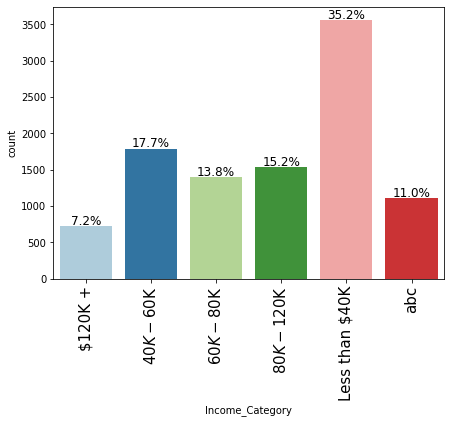

In [1314]:
labeled_barplot(data, "Income_Category", perc=True)

- Most customers make less than $40K income. 
- This is interesting to target for potential customers.

### Observations on Card Category

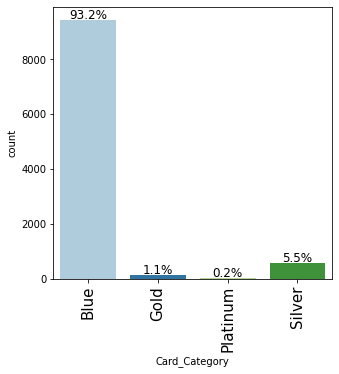

In [1315]:
labeled_barplot(data, "Card_Category", perc=True)

- An overwhelming majority of customers are in the Blue card category. 
- This might indicate it is the easiest card to qualify. 
- The bank may want to consider if they need to change the qualification criteria of the other cards to distribute the card categories.

### Observations on Total Relationship Count

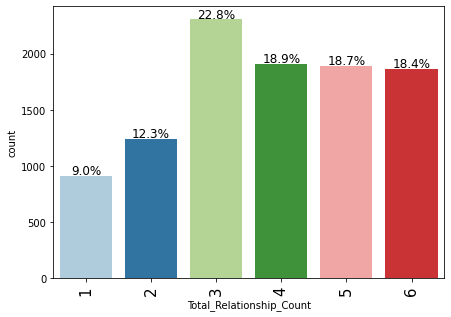

In [1316]:
labeled_barplot(data, "Total_Relationship_Count", perc=True)

- Most customers have 3 or more products. 

### Observations on Months Inactive

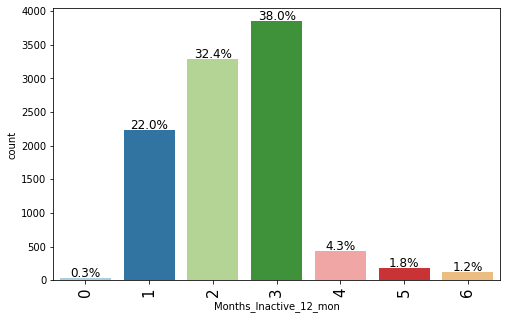

In [1317]:
labeled_barplot(data, "Months_Inactive_12_mon", perc=True)

- On average most customers are inactive for 1-3 months. 

### Observations on Contacts Count

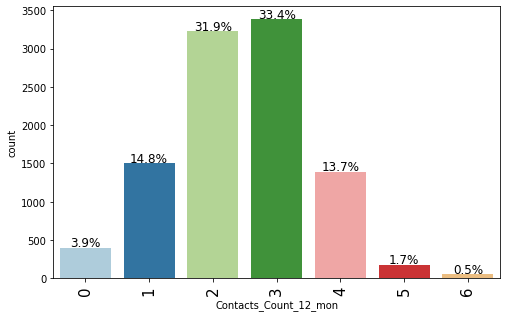

In [1318]:
labeled_barplot(data, "Contacts_Count_12_mon", perc=True)

- Most customers are contacted 2-3 times. 

## Bivariate Analysis

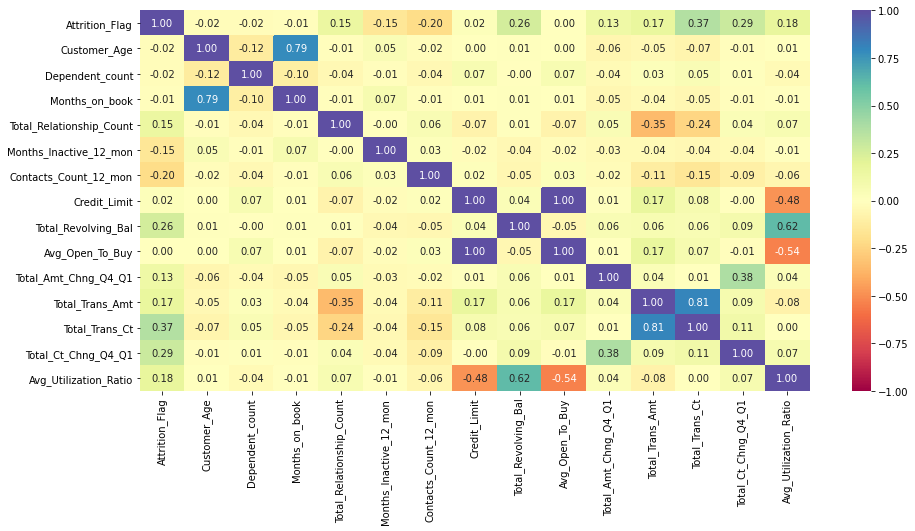

In [1319]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Avg_Open_To_Buy and Credit_Limit are highly correlated.

* We do also notice some correlation between Total_Trans_Ct and Total_Trans_Amt which makes sense.

* Avg_Utilization_Ratio and Avg_Open_To_Buy have a strong negative correlation of -0.54.

In [1320]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Gender vs Attrition_Flag

Attrition_Flag     0     1    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


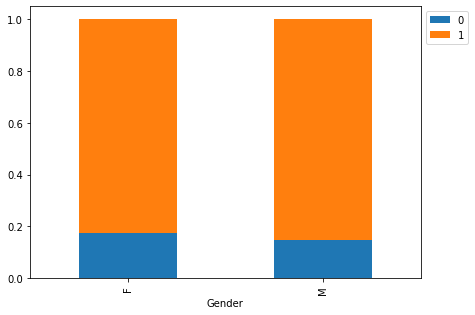

In [1321]:
stacked_barplot(data, "Gender", "Attrition_Flag")

- More female customers renounced their credit cards than male customers

### Dependent_count vs Attrition_Flag

Attrition_Flag      0     1    All
Dependent_count                   
All              1627  8500  10127
3                 482  2250   2732
2                 417  2238   2655
1                 269  1569   1838
4                 260  1314   1574
0                 135   769    904
5                  64   360    424
------------------------------------------------------------------------------------------------------------------------


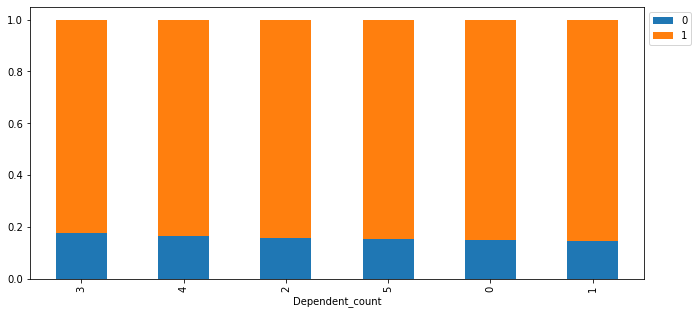

In [1322]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

* Customers with 2-3 dependents also were the ones who renounced their credic card accounts.

### Education_Level vs Attrition_Flag

Attrition_Flag      0     1   All
Education_Level                  
All              1371  7237  8608
Graduate          487  2641  3128
High School       306  1707  2013
Uneducated        237  1250  1487
College           154   859  1013
Doctorate          95   356   451
Post-Graduate      92   424   516
------------------------------------------------------------------------------------------------------------------------


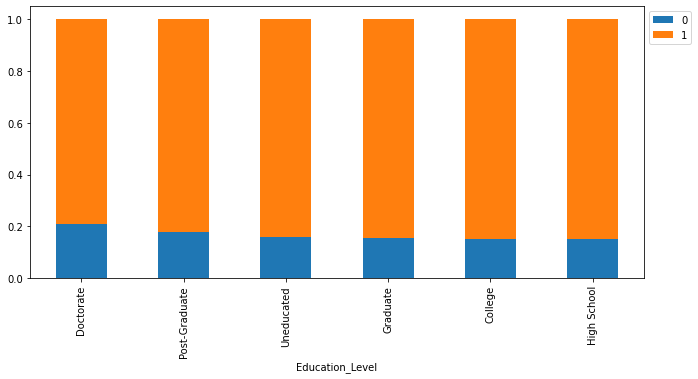

In [1323]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* Customers with a graduate level of education had the most customers renounce their credit cards with customers with a high school level of education at a close second.

### Marital_Status vs Attrition_Flag

Attrition_Flag     0     1   All
Marital_Status                  
All             1498  7880  9378
Married          709  3978  4687
Single           668  3275  3943
Divorced         121   627   748
------------------------------------------------------------------------------------------------------------------------


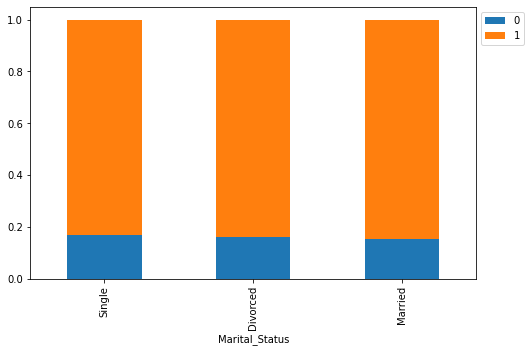

In [1324]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* Married and Single customers had the most cases of attrited customers.

### Income_Category vs Attrition_Flag

Attrition_Flag      0     1    All
Income_Category                   
All              1627  8500  10127
Less than $40K    612  2949   3561
$40K - $60K       271  1519   1790
$80K - $120K      242  1293   1535
$60K - $80K       189  1213   1402
abc               187   925   1112
$120K +           126   601    727
------------------------------------------------------------------------------------------------------------------------


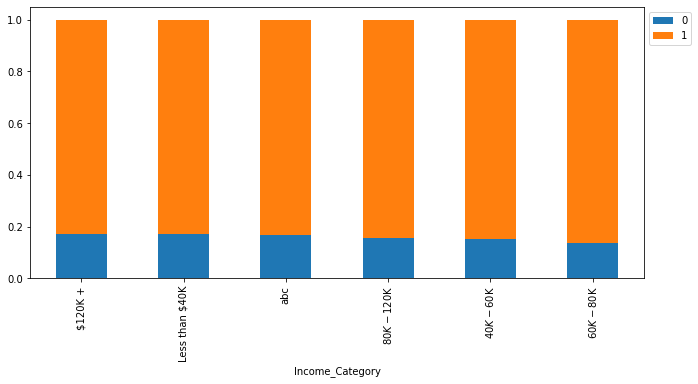

In [1325]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* A majority of the attrited customers make less than $40k

### Card_Category vs Attrition_Flag

Attrition_Flag     0     1    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------------------------------------------------------------------------------------------------


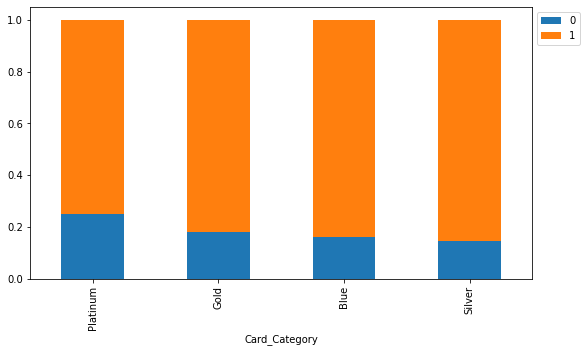

In [1326]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* As expected, most customers who attrited had a Blue card
* This makes sense as a majority of the customers in the dataset also have Blue card

### Total_Relationship_Count vs Attrition_Flag

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       1627  8500  10127
3                          400  1905   2305
2                          346   897   1243
1                          233   677    910
5                          227  1664   1891
4                          225  1687   1912
6                          196  1670   1866
------------------------------------------------------------------------------------------------------------------------


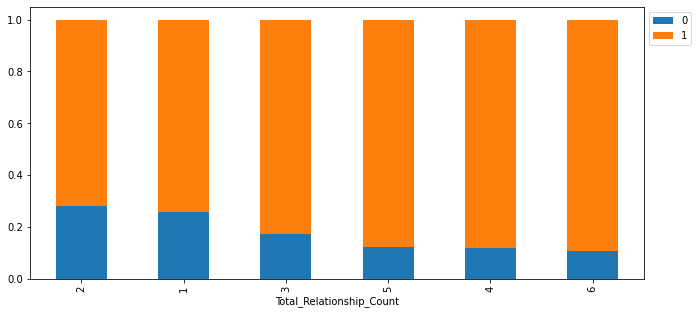

In [1327]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

* Customers with 2 or 3 relationships with the bank had higher counts of attrited customers

### Months_Inactive_12_mon vs Attrition_Flag

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     1627  8500  10127
3                        826  3020   3846
2                        505  2777   3282
4                        130   305    435
1                        100  2133   2233
5                         32   146    178
6                         19   105    124
0                         15    14     29
------------------------------------------------------------------------------------------------------------------------


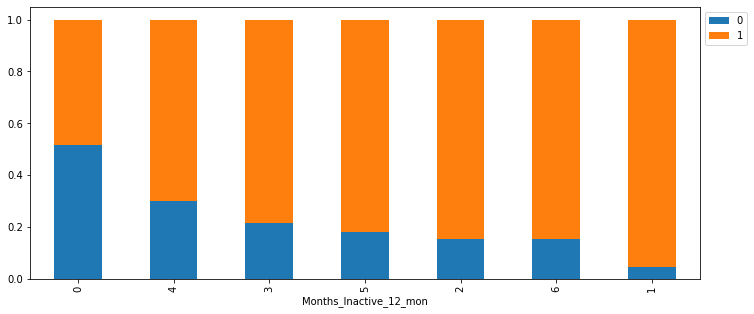

In [1328]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

* Customers with 3 inactive months had higher counts of attrited customers

### Contacts_Count_12_mon vs Attrition_Flag

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    1627  8500  10127
3                       681  2699   3380
2                       403  2824   3227
4                       315  1077   1392
1                       108  1391   1499
5                        59   117    176
6                        54     0     54
0                         7   392    399
------------------------------------------------------------------------------------------------------------------------


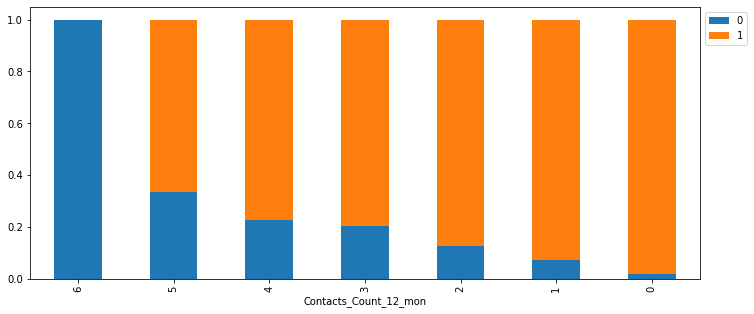

In [1329]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

* Customers who were contacted 3 times in the last 12 months had higher counts of attrited customers

In [1330]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Total_Trans_Ct vs Attrition_Flag

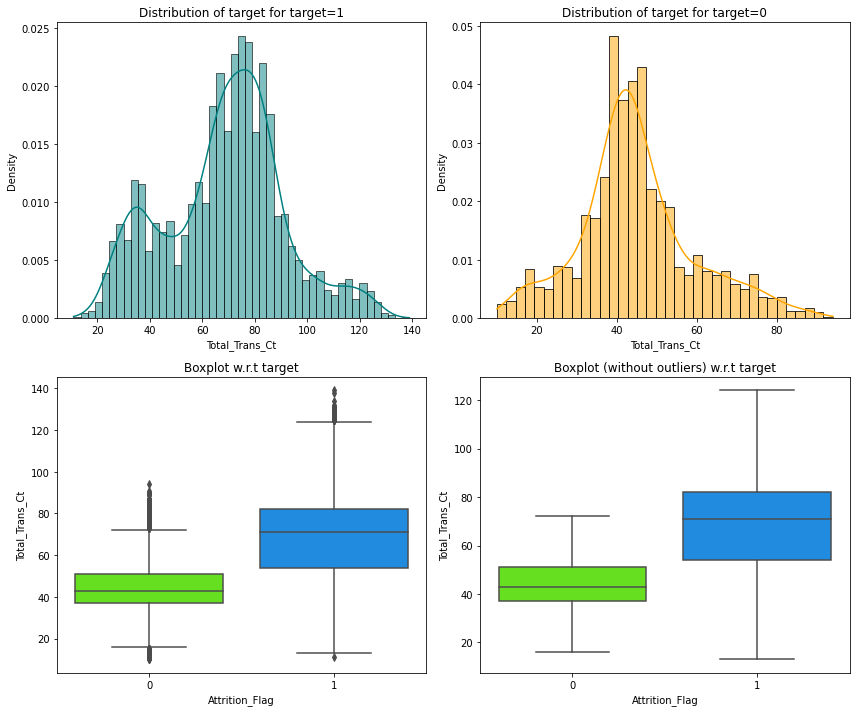

In [1331]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

* Customers who have a total transaction count between 0 and ~90 were found to have renounced their credit cards
* The highest concentration of customers who closed their accounts was seen to be betweek 40 and 50 transaction counts

### Total_Trans_Amt vs Attrition_Flag

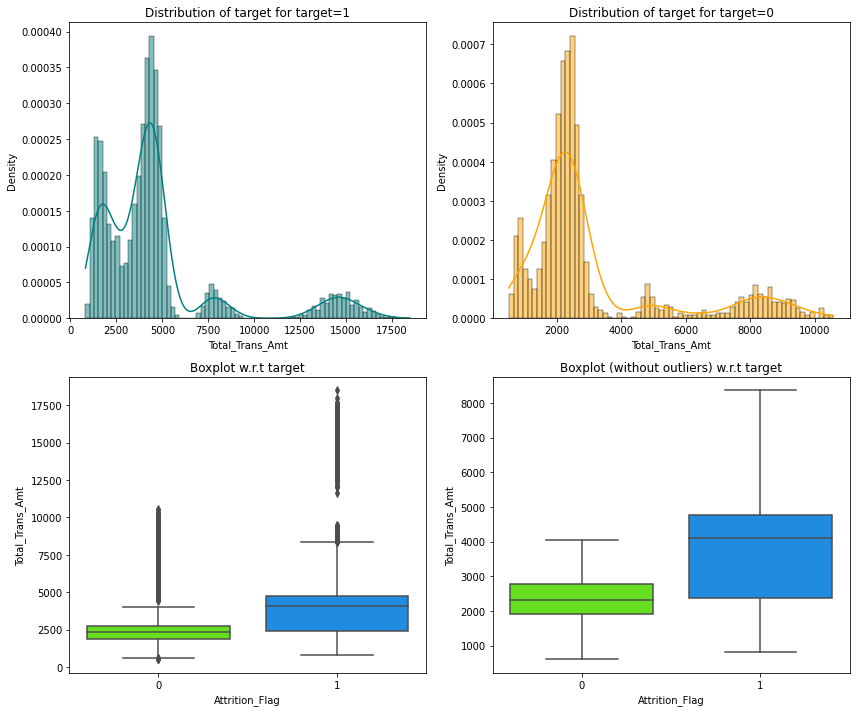

In [1332]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

* Total transaction amount between 2k and 3k had the highest concentration of attrited customers
* There were some outliers of attrited customers at about 8.5k total transaction count

### Total_Revolving_Bal vs Attrition_Flag

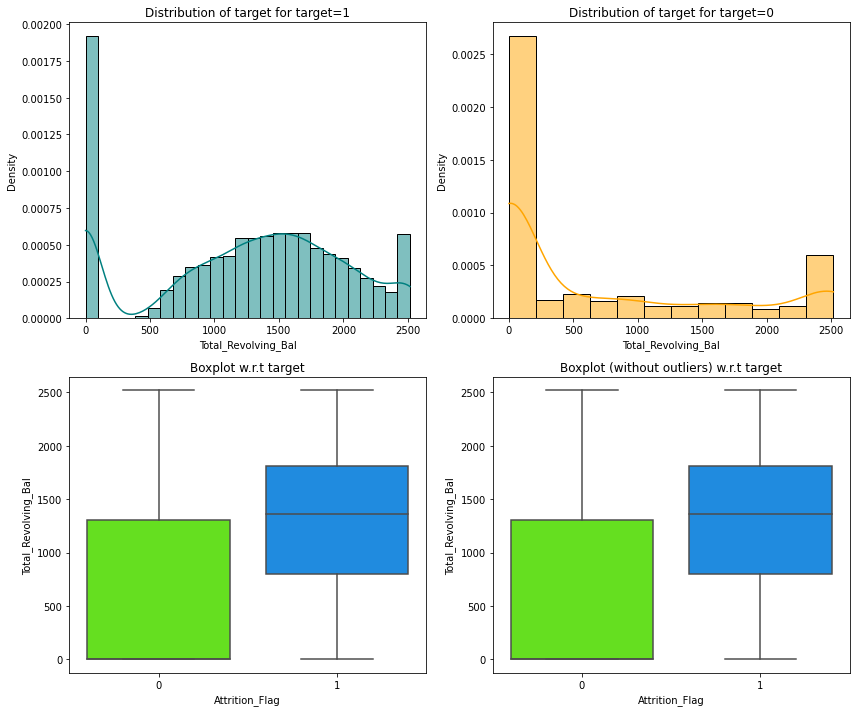

In [1333]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* The revolving balance for attrited customer had the highest concentration around 0
* The distribution of total revolving balance for attrited customers was mostly uniform aside from the peak at 0 and a small concentration at about 2.5k

### Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

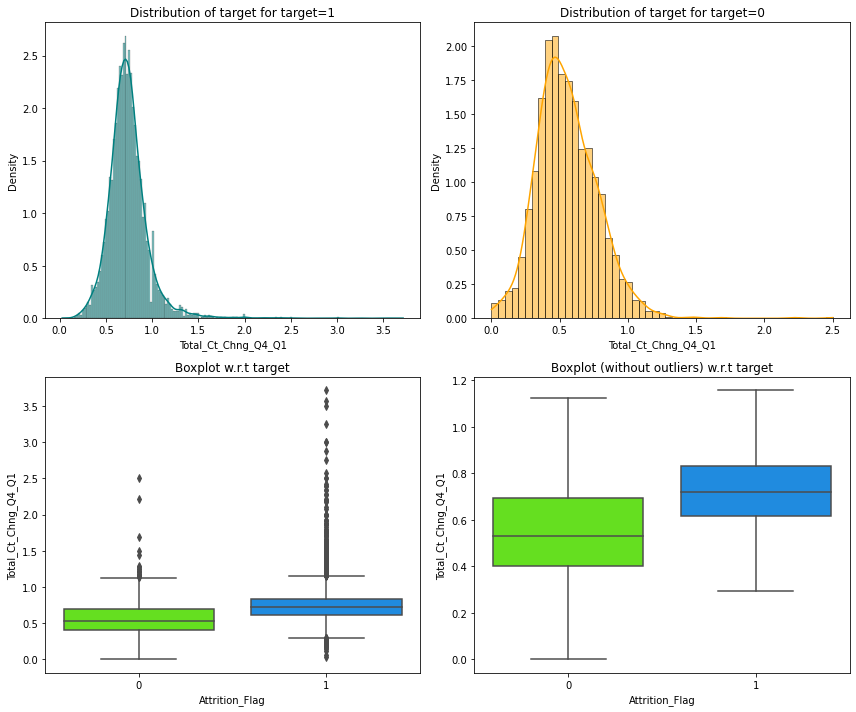

In [1334]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* The distribution of the ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter compared to attrited customers and existing customers are similar in shape but attrited customer had a slightly lower ratio on average
* Attrited customers mostly on average mostly had a ratio of ~0.4-0.5 while existing customers have a ratio of about 0.7

### Filling missing values

* Here we will be treating issues with the data that we have noticed in our analysis above
* The columns we will be treating are the Education_Level and Marital_Status which have missing values
* We also noticed that the Income_Category had a value of 'abc' which is meaningless to our analysis
* For Income_Category, we will treat the 'abc' column as unknown and impute the data

In [1335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [1336]:
data['Education_Level'] = data['Education_Level'].fillna(data['Education_Level'].mode().iloc[0])
data['Marital_Status'] = data['Marital_Status'].fillna(data['Marital_Status'].mode().iloc[0])

* Here we have filled the missing values found in Education_Level and Marital_Status

In [1337]:
data["Income_Category"] = data["Income_Category"].replace({'abc': np.nan})

In [1338]:
data["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', nan], dtype=object)

In [1339]:
data['Income_Category'].fillna(data['Income_Category'].mode()[0], inplace=True)

In [1340]:
data["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

* Here we have converted the 'abc' column to NaN and imputed with the mode of the column.
* This has now successfuly treated the Income_Category column with the most frequent instance of the data.

In [1341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

* Here we see that we now have a complete data set to work with.

### Outliers

* Here we will investigate the outliers as most of our numeric data is skewed with several outliers. 
* We will investigate to confirm this claim.

In [1342]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

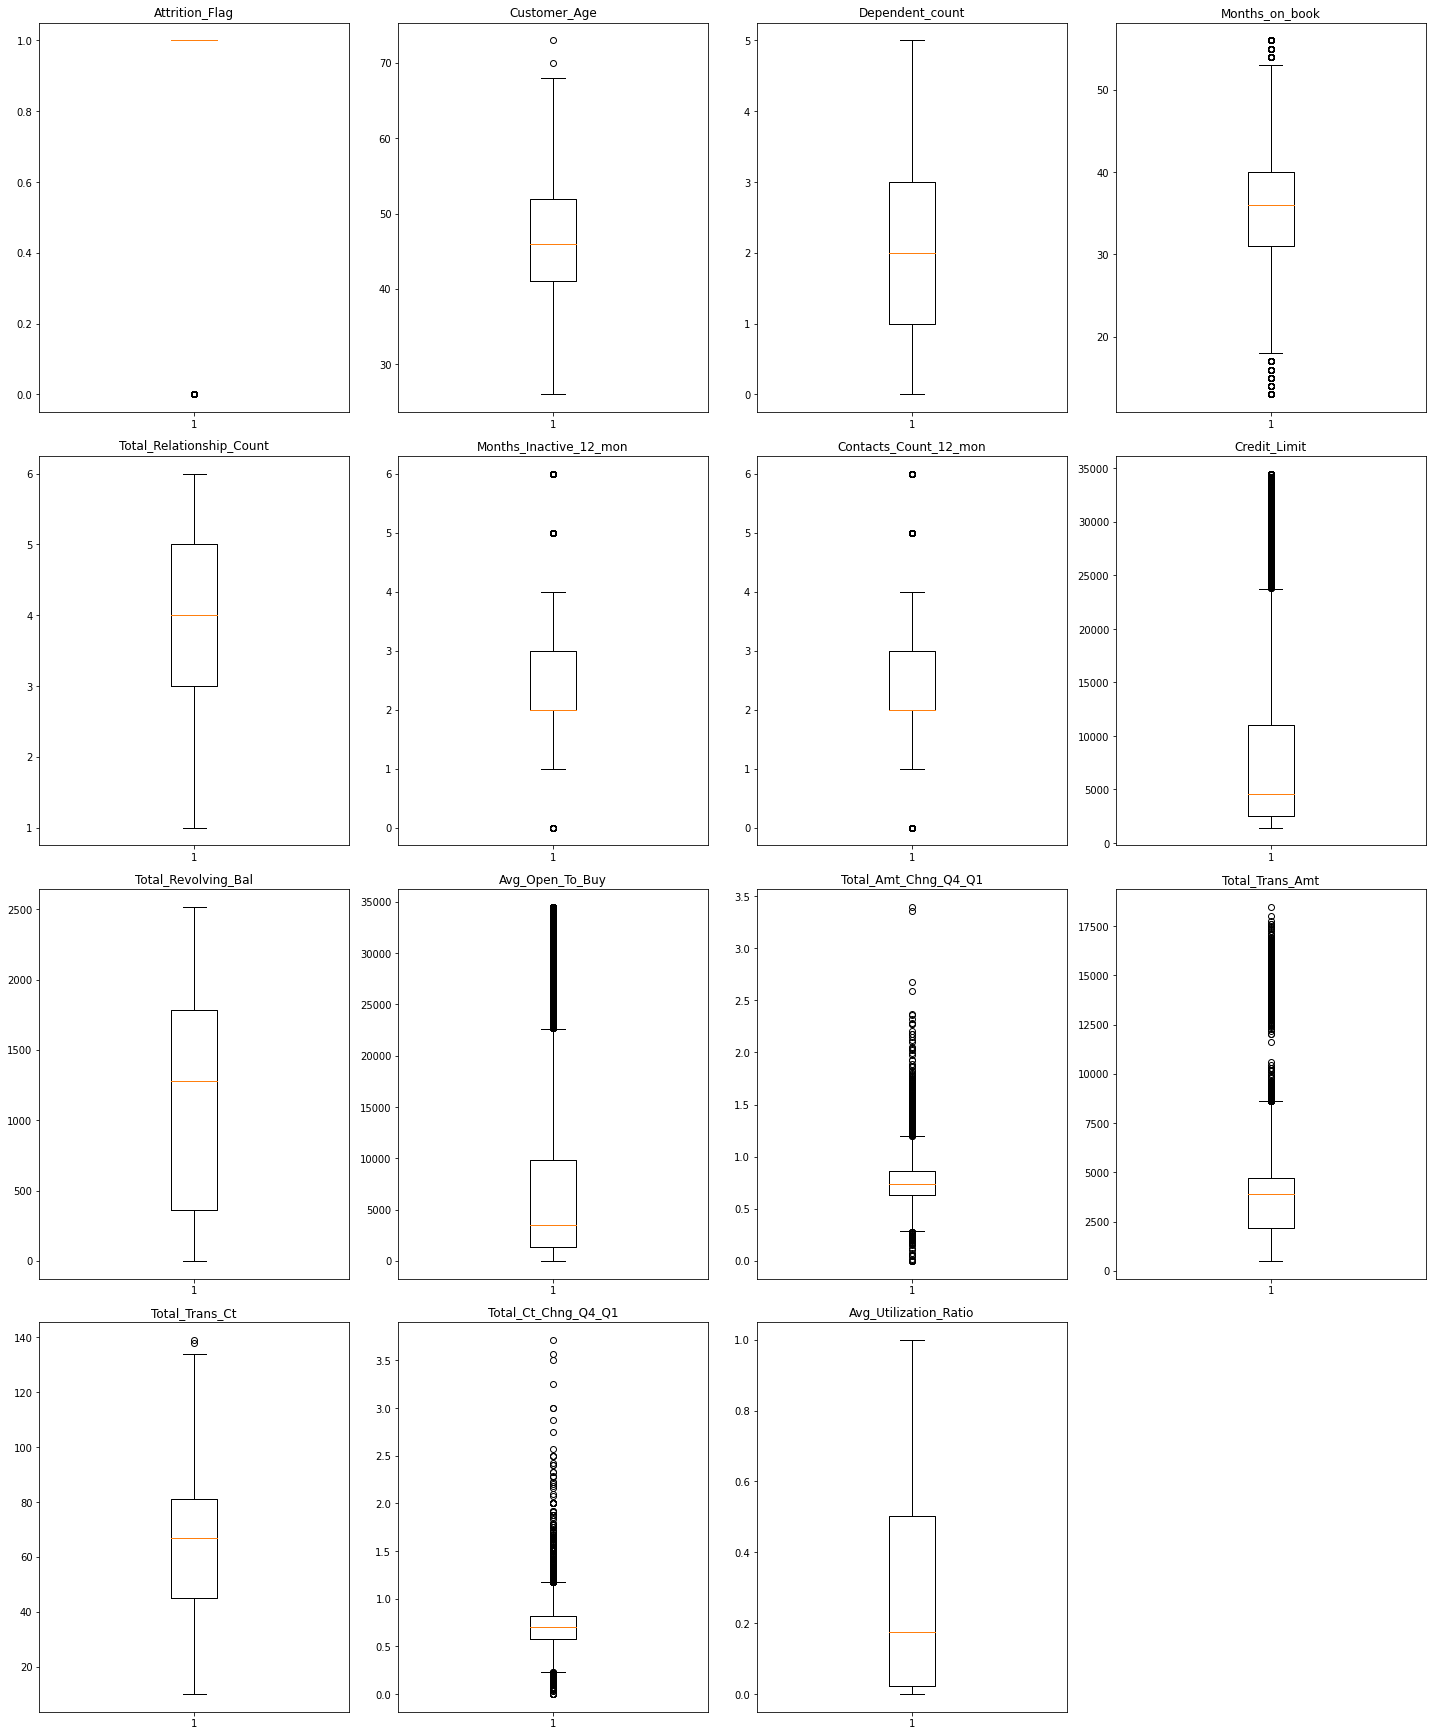

In [1343]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Eight of our variables appear to have outliers: Customer_Age, Months_on_book, Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, and Total_Ct_Chng_Q4_Q1

* We will treat only these eight variable for outliers.

* We will exclude the other variables as they either do not have outliers or they have few values that are distributed.

### Outlier Treatment

In [1344]:
# Let's treat outliers by flooring and capping
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    cars: dataframe
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    cars: data frame
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [1345]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, data[['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']])

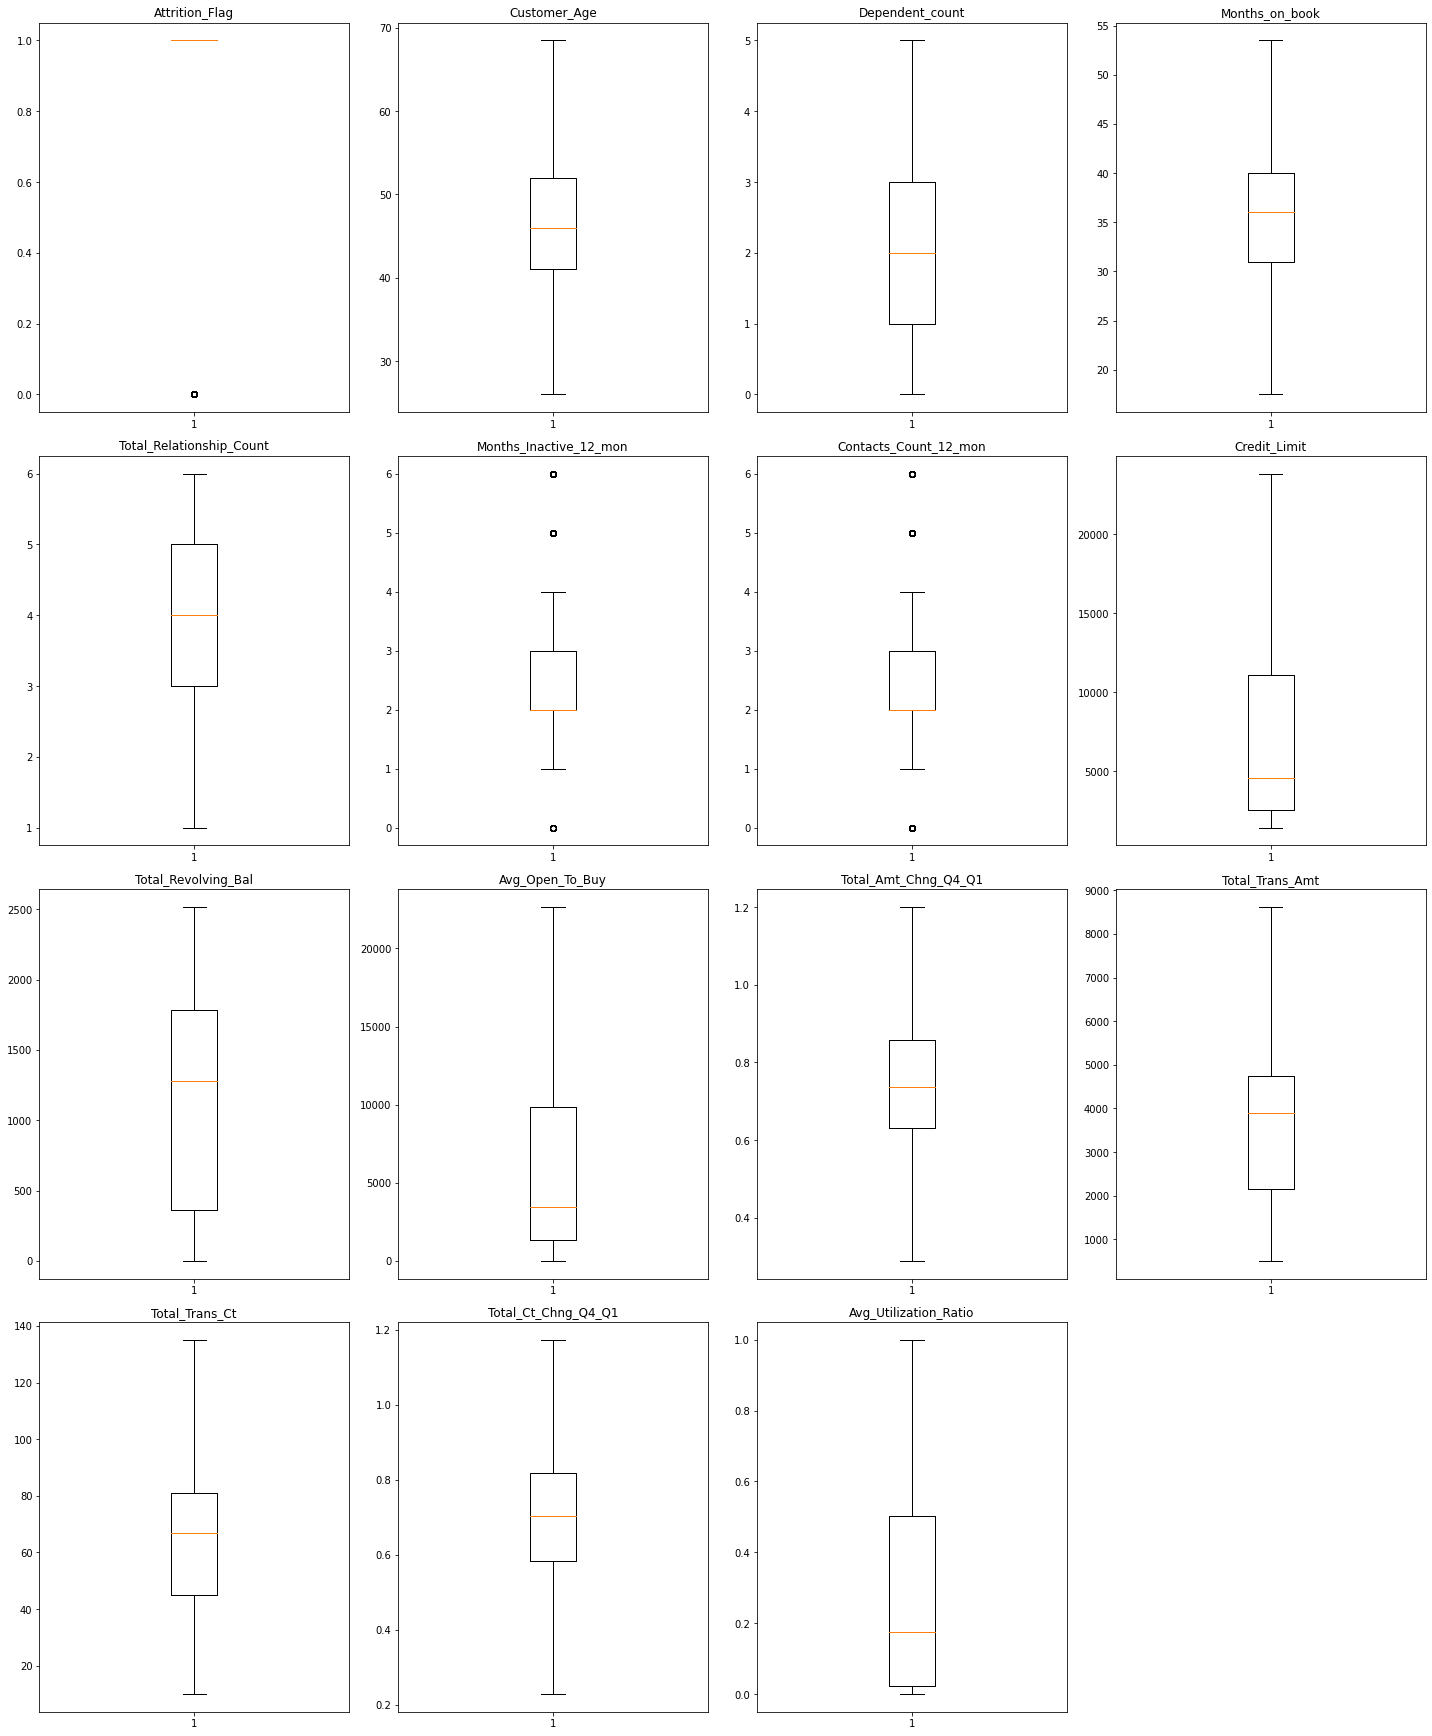

In [1346]:
# Verifying via box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All numerical variables that had outliers have been treated.
* Only the target variables have been treated for outliers.

### Data Preparation for Modeling

In [1347]:
# defining X and y variables
X = data.drop(["Attrition_Flag"], axis=1)
y = data[["Attrition_Flag"]]

print(X.head())
print(y.head())

   Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0          45.0      M                3     High School        Married   
1          49.0      F                5        Graduate         Single   
2          51.0      M                3        Graduate        Married   
3          40.0      F                4     High School        Married   
4          40.0      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue            39.0                         5   
1  Less than $40K          Blue            44.0                         6   
2    $80K - $120K          Blue            36.0                         4   
3  Less than $40K          Blue            34.0                         3   
4     $60K - $80K          Blue            21.0                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1 

In [1348]:
print(X.shape)
print(y.shape)

(10127, 19)
(10127, 1)


In [1349]:
X = pd.get_dummies(X, columns=["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"], drop_first=True)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=.20, random_state=1,stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [1350]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9501,47.0,2,37.0,1,2,2,21714.0,1969,19745.0,0.944,...,0,0,0,0,0,1,0,0,0,0
5065,49.0,4,42.0,5,1,4,7789.0,957,6832.0,0.724,...,0,0,1,0,0,0,1,0,0,0
2375,53.0,2,36.0,6,1,3,3176.0,1470,1706.0,0.388,...,0,1,0,0,0,0,1,0,0,0
7579,56.0,2,45.0,3,3,1,3296.0,1435,1861.0,0.968,...,0,0,0,0,0,0,0,0,0,0
2776,47.0,4,36.0,3,3,3,17557.0,0,17557.0,0.667,...,1,1,0,0,1,0,0,0,0,0


In [1351]:
imputer = SimpleImputer(strategy="median")

In [1352]:
impute = imputer.fit(X_train)

In [1353]:
X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

In [1354]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

In [1355]:
models

[('Bagging', BaggingClassifier(random_state=1)),
 ('Random forest', RandomForestClassifier(random_state=1)),
 ('GBM', GradientBoostingClassifier(random_state=1)),
 ('Adaboost', AdaBoostClassifier(random_state=1)),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                eval_metric='logloss', gamma=None, gpu_id=None,
                importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=1, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None)),
 ('dtree', DecisionTreeClassifier(random_state=1))]

In [1356]:
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

Bagging: 0.9758823529411764
Random forest: 0.9852941176470589
GBM: 0.9888235294117647
Adaboost: 0.9823529411764705
Xgboost: 0.9911764705882353
dtree: 0.9623529411764706


In [1357]:
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))


Cross-Validation Performance:

Bagging: 97.21545536762302
Random forest: 98.62729704246765
GBM: 98.88221824549251
Adaboost: 97.98004579653255
Xgboost: 98.62722007350536
dtree: 96.25438242028903


In [1358]:
results

[array([0.96764706, 0.96862745, 0.97058824, 0.96568627, 0.98822375]),
 array([0.98529412, 0.9872549 , 0.98431373, 0.98235294, 0.99214917]),
 array([0.98823529, 0.9872549 , 0.9872549 , 0.98823529, 0.99313052]),
 array([0.98431373, 0.9754902 , 0.97843137, 0.97843137, 0.98233562]),
 array([0.98921569, 0.9872549 , 0.98333333, 0.98333333, 0.98822375]),
 array([0.9627451 , 0.9627451 , 0.95686275, 0.95686275, 0.97350343])]

# Model evaluation criterion:

**What does a bank want?**
* A bank wants to minimize the loss - it can face 2 types of losses here: 
   * A customer who would leave the bank's credit card services.
   * A customer not opening credit card services with the bank.

**Which loss is greater ?**
* A customer who would leave the bank's credit card services.

**Since we want to reduce customer attrition we should use Recall as a metric of model evaluation instead of accuracy.**

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting attrited customer as a non-attrited customer.

In [1359]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [1360]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression 

Training performance:
    Accuracy    Recall  Precision        F1
0  0.888066  0.964503   0.907883  0.935337
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.880059  0.964706   0.899616  0.931025


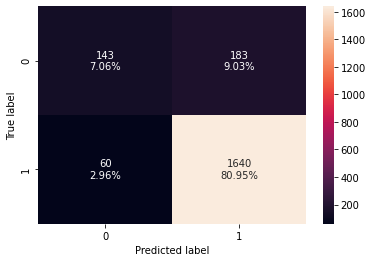

In [1361]:
#Fitting the model
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

#Calculating different metrics
log_reg_model_train_perf = model_performance_classification_sklearn(lr, X_train, y_train)
print("Training performance:\n", log_reg_model_train_perf)
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:\n", log_reg_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.
* This is a strong model giving us comparable scores between training and validation set.
* Accuracy and precision are ok but may be improved.

### Evaluating the model performance by using KFold and cross_val_score

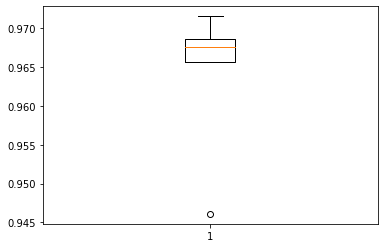

In [1362]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.96 to 0.97 recall.

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.933366  0.962353   0.958407  0.960376


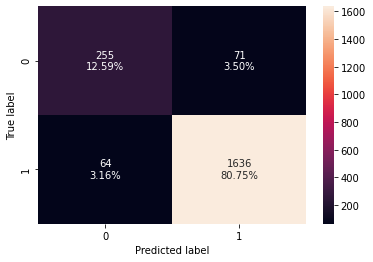

In [1363]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree, X_train,y_train)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_val_perf=model_performance_classification_sklearn(d_tree, X_val, y_val)
print("Validation performance:\n", d_tree_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_val, y_val)

- The model is not necessarily overfitting as the validation performance is close to the training performance but the training performance is has no variation. As such this model will not be trusted.

## Bagging Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.997202  0.99745   0.999214  0.998332
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.950148  0.975882   0.965096  0.970459


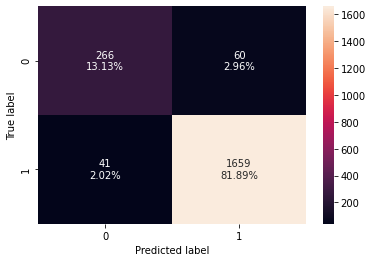

In [1364]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier, X_train,y_train)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_val_perf=model_performance_classification_sklearn(bagging_classifier, X_val, y_val)
print("Validation performance:\n",bagging_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_val, y_val)

- With default parameters, the bagging classifier is performing well overall.
- The model is not overfitting the data.

## AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.961317  0.982546   0.971683  0.977084
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.955084  0.982353    0.96476  0.973477


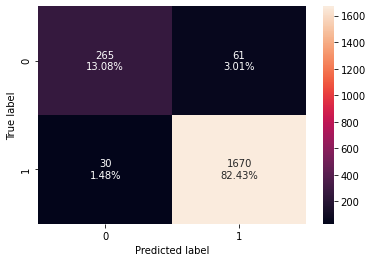

In [1365]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_val_perf=model_performance_classification_sklearn(ab_classifier, X_val, y_val)
print("Validation performance:\n", ab_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_val, y_val)

- The model is not overfitting the data and the overall performance is good.
- Both test and validation set are performing well.

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision       F1
0   0.97893  0.993136   0.981966  0.98752
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.961007  0.988824   0.965537  0.977042


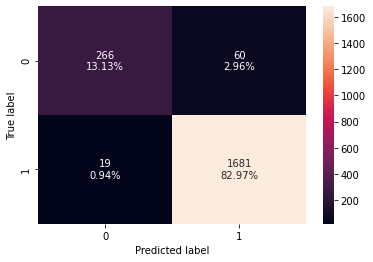

In [1366]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_val_perf=model_performance_classification_sklearn(gb_classifier, X_val, y_val)
print("Validation performance:\n", gb_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_val, y_val)

- Overall model performance is pretty good.
- Performance on both validation and training performance is comparable.

## XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.971866  0.991176    0.97568  0.983367


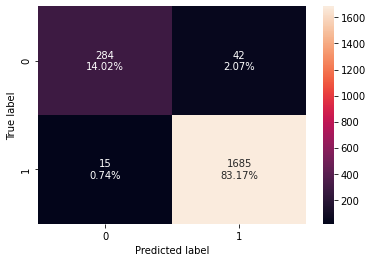

In [1367]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric= "error")
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier, X_train,y_train)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_val_perf=model_performance_classification_sklearn(xgb_classifier, X_val, y_val)
print("Validation performance:\n", xgb_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_val, y_val)

- The model is not necessarily overfitting as the validation performance is close to the training performance but the training performance is has no variation. Similar to the performance of the decision tree model, this model will not be trusted.

In [1368]:
# training performance comparison

models_train_comp_df = pd.concat(
    [log_reg_model_train_perf.T,d_tree_model_train_perf.T, bagging_classifier_model_train_perf.T, ab_classifier_model_train_perf.T,
    gb_classifier_model_train_perf.T, xgb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Bagging Classifier",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Decision Tree,Bagging Classifier,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.888066,1.0,0.997202,0.961317,0.978930,1.0
Recall,0.964503,1.0,0.997450,0.982546,0.993136,1.0
Precision,0.907883,1.0,0.999214,0.971683,0.981966,1.0
F1,0.935337,1.0,0.998332,0.977084,0.987520,1.0


In [1369]:
# validation performance comparison

models_train_comp_df = pd.concat(
    [log_reg_model_val_perf.T,d_tree_model_val_perf.T, bagging_classifier_model_val_perf.T, ab_classifier_model_val_perf.T,
    gb_classifier_model_val_perf.T, xgb_classifier_model_val_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Bagging Classifier",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Logistic Regression,Decision Tree,Bagging Classifier,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.880059,0.933366,0.950148,0.955084,0.961007,0.971866
Recall,0.964706,0.962353,0.975882,0.982353,0.988824,0.991176
Precision,0.899616,0.958407,0.965096,0.964760,0.965537,0.975680
F1,0.931025,0.960376,0.970459,0.973477,0.977042,0.983367


- Overall all models performed well.
- Decision tree and XGBoost training performance were perfect across the board which is not what we want in our model.
- AdaBoost Classifier, Bagging Classifier, and Gradient Boosting Classifier had the strongest overall models in terms of fit and performance.

# Oversampling train data using SMOTE

In [1370]:
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

## Logistic Regression

Training performance:
    Accuracy    Recall  Precision        F1
0  0.827319  0.818396   0.833267  0.825764
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.824284  0.827647   0.957143  0.887697


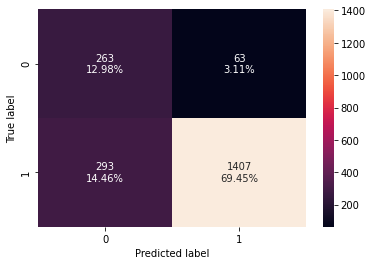

In [1371]:
#Fitting the model
lr_over = LogisticRegression(random_state=1)
lr_over.fit(X_train_over, y_train_over)

#Calculating different metrics
log_reg_over_model_train_perf = model_performance_classification_sklearn(lr_over, X_train_over, y_train_over)
print("Training performance:\n", log_reg_over_model_train_perf)
log_reg_over_model_val_perf = model_performance_classification_sklearn(lr_over, X_val, y_val)
print("Validation performance:\n", log_reg_over_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(lr_over, X_val, y_val)

* Model has given a generalized performance on training and validation set.
* Overall model performance is lower in all aspects.
* Would consider using original model over oversampled model.

### Evaluating the model performance by using KFold and cross_val_score

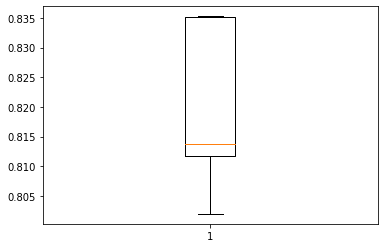

In [1372]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=lr_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance on training set varies between 0.81 to 0.83, which is much lower than our normal sampled data.

## Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.923495  0.948824   0.959548  0.954156


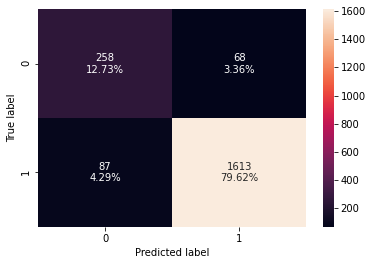

In [1373]:
#Fitting the model
d_tree_over = DecisionTreeClassifier(random_state=1)
d_tree_over.fit(X_train_over,y_train_over)

#Calculating different metrics
d_tree_over_model_train_perf=model_performance_classification_sklearn(d_tree_over, X_train_over,y_train_over)
print("Training performance:\n", d_tree_over_model_train_perf)
d_tree_over_model_val_perf=model_performance_classification_sklearn(d_tree_over, X_val, y_val)
print("Validation performance:\n", d_tree_over_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree_over, X_val, y_val)

- The model is not necessarily overfitting as the validation performance is close to the training performance but the training performance is has no variation. As such this model will not be trusted.

## Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.997058  0.995293   0.998819  0.997053
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.942251  0.961176   0.969733  0.965436


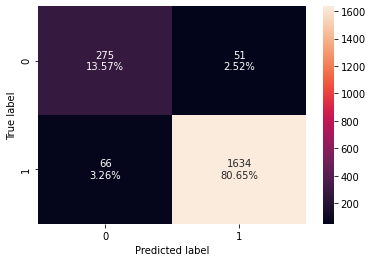

In [1374]:
#Fitting the model
bagging_classifier_over = BaggingClassifier(random_state=1)
bagging_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
bagging_classifier_over_model_train_perf=model_performance_classification_sklearn(bagging_classifier_over, X_train_over,y_train_over)
print("Training performance:\n",bagging_classifier_over_model_train_perf)
bagging_classifier_over_model_val_perf=model_performance_classification_sklearn(bagging_classifier_over, X_val, y_val)
print("Validation performance:\n",bagging_classifier_over_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier_over, X_val, y_val)

- Model performance overall is doing well on the training data
- Validation performance is slightly lower than the training data.
- Overall the normal bagging model performance is better than over sampled model.

## AdaBoost

Training performance:
    Accuracy   Recall  Precision        F1
0    0.9697  0.96921   0.970161  0.969685
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.947187  0.967647   0.969358  0.968502


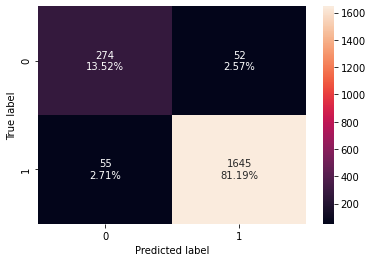

In [1375]:
#Fitting the model
ab_classifier_over = AdaBoostClassifier(random_state=1)
ab_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
ab_classifier_over_model_train_perf=model_performance_classification_sklearn(ab_classifier_over, X_train_over,y_train_over)
print("Training performance:\n",ab_classifier_over_model_train_perf)
ab_classifier_over_model_val_perf=model_performance_classification_sklearn(ab_classifier_over, X_val, y_val)
print("Validation performance:\n",ab_classifier_over_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_over, X_val, y_val)

- The model is not overfitting the data and the overall performance is good.
- Both test and validation set are performing well although accuracy on the validation set is slightly lower compared to the rest of the performance.
- Normal model is performing slightly better than the oversampled model.

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.983428  0.983134   0.983713  0.983423
Validation performance:
    Accuracy    Recall  Precision        F1
0   0.96002  0.978824   0.973669  0.976239


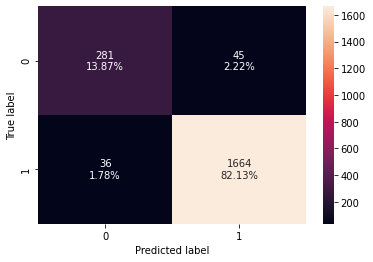

In [1376]:
#Fitting the model
gb_classifier_over = GradientBoostingClassifier(random_state=1)
gb_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
gb_classifier_over_model_train_perf=model_performance_classification_sklearn(gb_classifier_over, X_train_over,y_train_over)
print("Training performance:\n",gb_classifier_over_model_train_perf)
gb_classifier_over_model_val_perf=model_performance_classification_sklearn(gb_classifier_over, X_val, y_val)
print("Validation performance:\n",gb_classifier_over_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_over, X_val, y_val)

- Overall model performance is pretty good.
- Performance on both validation and training performance is comparable.
- Model performance is just as good as performance on the normal dataset.

## XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.968904  0.987059   0.976149  0.981574


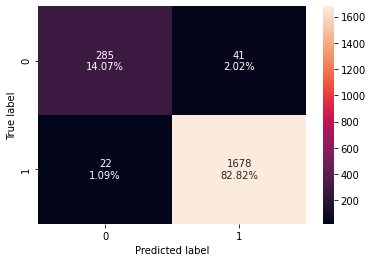

In [1377]:
#Fitting the model
xgb_classifier_over = XGBClassifier(random_state=1, eval_metric= "error")
xgb_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
xgb_classifier_over_model_train_perf=model_performance_classification_sklearn(xgb_classifier_over, X_train_over,y_train_over)
print("Training performance:\n",xgb_classifier_over_model_train_perf)
xgb_classifier_over_model_val_perf=model_performance_classification_sklearn(xgb_classifier_over, X_val, y_val)
print("Validation performance:\n",xgb_classifier_over_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_over, X_val, y_val)

- The model is not necessarily overfitting as the validation performance is close to the training performance but the training performance is has no variation. Similar to the performance of the decision tree model, this model will not be trusted.

In [1378]:
# training performance comparison

models_train_comp_df = pd.concat(
    [log_reg_over_model_train_perf.T,d_tree_over_model_train_perf.T, bagging_classifier_over_model_train_perf.T, ab_classifier_over_model_train_perf.T,
    gb_classifier_over_model_train_perf.T, xgb_classifier_over_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Bagging Classifier",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Over Sampled Training performance comparison:")
models_train_comp_df

Over Sampled Training performance comparison:


,Logistic Regression,Decision Tree,Bagging Classifier,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.827319,1.0,0.997058,0.969700,0.983428,1.0
Recall,0.818396,1.0,0.995293,0.969210,0.983134,1.0
Precision,0.833267,1.0,0.998819,0.970161,0.983713,1.0
F1,0.825764,1.0,0.997053,0.969685,0.983423,1.0


In [1379]:
# validation performance comparison

models_train_comp_df = pd.concat(
    [log_reg_over_model_val_perf.T,d_tree_over_model_val_perf.T, bagging_classifier_over_model_val_perf.T, ab_classifier_over_model_val_perf.T,
    gb_classifier_over_model_val_perf.T, xgb_classifier_over_model_val_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Bagging Classifier",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Over Sampled Validation performance comparison:")
models_train_comp_df

Over Sampled Validation performance comparison:


,Logistic Regression,Decision Tree,Bagging Classifier,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.824284,0.923495,0.942251,0.947187,0.960020,0.968904
Recall,0.827647,0.948824,0.961176,0.967647,0.978824,0.987059
Precision,0.957143,0.959548,0.969733,0.969358,0.973669,0.976149
F1,0.887697,0.954156,0.965436,0.968502,0.976239,0.981574


- Overall all oversampled models performed well but slightly lower in general compared to the normal models.
- Decision tree and XGBoost training performance were perfect across the board which is not what we want in our model.
- Bagging Classifier and Gradient Boosting Classifier had the strongest overall models in terms of fit and performance.

# Undersampling train data using RandomUnderSampler

In [1380]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

## Logistic Regression

Training performance:
    Accuracy    Recall  Precision        F1
0   0.80584  0.803279   0.807415  0.805342
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.821816  0.826471   0.955133  0.886156


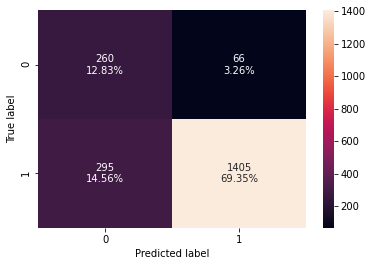

In [1381]:
#Fitting the model
lr_un = LogisticRegression(random_state=1)
lr_un.fit(X_train_un, y_train_un)

#Calculating different metrics
log_reg_un_model_train_perf = model_performance_classification_sklearn(lr_un, X_train_un, y_train_un)
print("Training performance:\n", log_reg_un_model_train_perf)
log_reg_un_model_val_perf = model_performance_classification_sklearn(lr_un, X_val, y_val)
print("Validation performance:\n", log_reg_un_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(lr_un, X_val, y_val)

* Model appears to be underfitting on the calidation set slightly.
* Model performance has not improved using downsampling.
* We maintain that the normal model is the better model.

### Evaluating the model performance by using KFold and cross_val_score

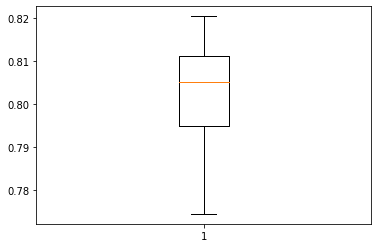

In [1382]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=lr_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.80 to 0.81, which is similar to model with oversampled data
* Performance is again much lower than our original model.

## Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0    0.9077  0.913529    0.97489  0.943213


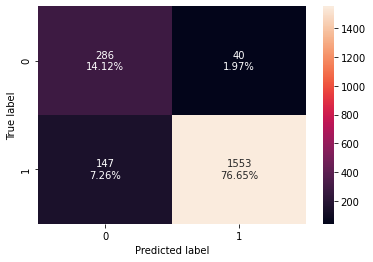

In [1383]:
#Fitting the model
d_tree_un = DecisionTreeClassifier(random_state=1)
d_tree_un.fit(X_train_un,y_train_un)

#Calculating different metrics
d_tree_un_model_train_perf=model_performance_classification_sklearn(d_tree_un, X_train_un,y_train_un)
print("Training performance:\n", d_tree_un_model_train_perf)
d_tree_un_model_val_perf=model_performance_classification_sklearn(d_tree_un, X_val, y_val)
print("Validation performance:\n", d_tree_un_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree_un, X_val, y_val)

- The model is not necessarily overfitting as the validation performance is close to the training performance but the training performance is has no variation. As such this model will not be trusted.

## Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996926  0.993852        1.0  0.996917
Validation performance:
    Accuracy    Recall  Precision        F1
0   0.92152  0.921765   0.983679  0.951716


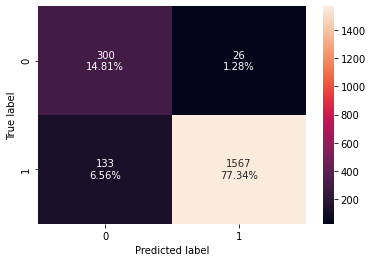

In [1384]:
#Fitting the model
bagging_classifier_un = BaggingClassifier(random_state=1)
bagging_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
bagging_classifier_un_model_train_perf=model_performance_classification_sklearn(bagging_classifier_un, X_train_un,y_train_un)
print("Training performance:\n",bagging_classifier_un_model_train_perf)
bagging_classifier_un_model_val_perf=model_performance_classification_sklearn(bagging_classifier_un, X_val, y_val)
print("Validation performance:\n",bagging_classifier_un_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier_un, X_val, y_val)

- Model performance overall is doing well on the training data
- Validation performance is slightly lower than the training data, especially in accuracy and recall.
- Overall the normal bagging model performance is better than over sampled model.

## AdaBoost

Training performance:
    Accuracy    Recall  Precision        F1
0  0.947234  0.941598   0.952332  0.946935
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.934847  0.936471   0.985149  0.960193


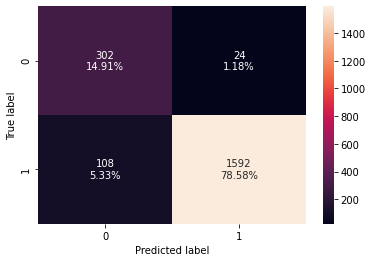

In [1385]:
#Fitting the model
ab_classifier_un = AdaBoostClassifier(random_state=1)
ab_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
ab_classifier_un_model_train_perf=model_performance_classification_sklearn(ab_classifier_un, X_train_un,y_train_un)
print("Training performance:\n",ab_classifier_un_model_train_perf)
ab_classifier_un_model_val_perf=model_performance_classification_sklearn(ab_classifier_un, X_val, y_val)
print("Validation performance:\n",ab_classifier_un_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_un, X_val, y_val)

- The model is not overfitting the data and the overall performance is good.
- Overall model performance is lower than the oversampled and normal model.

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0   0.97541  0.971311   0.979339  0.975309
Validation performance:
    Accuracy    Recall  Precision      F1
0  0.948667  0.952941   0.985401  0.9689


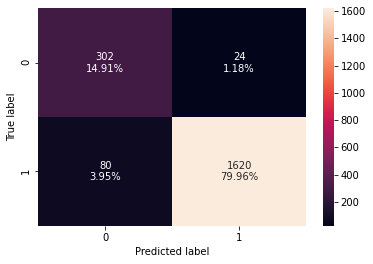

In [1386]:
#Fitting the model
gb_classifier_un = GradientBoostingClassifier(random_state=1)
gb_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
gb_classifier_un_model_train_perf=model_performance_classification_sklearn(gb_classifier_un, X_train_un,y_train_un)
print("Training performance:\n",gb_classifier_un_model_train_perf)
gb_classifier_un_model_val_perf=model_performance_classification_sklearn(gb_classifier_un, X_val, y_val)
print("Validation performance:\n",gb_classifier_un_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_un, X_val, y_val)

- Overall model performance is pretty good.
- Performance on both validation and training performance is lower than the previous two models.
- This model will likely not be considered as a strong model.

## XGB Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision       F1
0  0.952616  0.957647   0.985472  0.97136


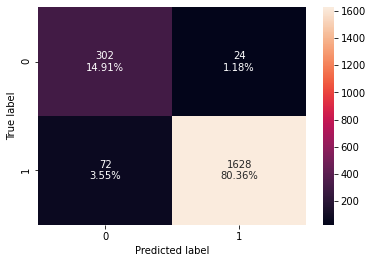

In [1387]:
#Fitting the model
xgb_classifier_un = XGBClassifier(random_state=1, eval_metric= "error")
xgb_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
xgb_classifier_un_model_train_perf=model_performance_classification_sklearn(xgb_classifier_un, X_train_un,y_train_un)
print("Training performance:\n",xgb_classifier_un_model_train_perf)
xgb_classifier_un_model_val_perf=model_performance_classification_sklearn(xgb_classifier_un, X_val, y_val)
print("Validation performance:\n",xgb_classifier_un_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_un, X_val, y_val)

- The model is is not necesserily overfitting as the validation performance is close to the training performance but the training performance is has no variation. Similar to the performance of the decision tree model, this model will not be trusted.

In [1388]:
# training performance comparison

models_train_comp_df = pd.concat(
    [log_reg_un_model_train_perf.T,d_tree_un_model_train_perf.T, bagging_classifier_un_model_train_perf.T, ab_classifier_un_model_train_perf.T,
    gb_classifier_un_model_train_perf.T, xgb_classifier_un_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Bagging Classifier",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Under Sampled Training performance comparison:")
models_train_comp_df

Under Sampled Training performance comparison:


,Logistic Regression,Decision Tree,Bagging Classifier,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.805840,1.0,0.996926,0.947234,0.975410,1.0
Recall,0.803279,1.0,0.993852,0.941598,0.971311,1.0
Precision,0.807415,1.0,1.000000,0.952332,0.979339,1.0
F1,0.805342,1.0,0.996917,0.946935,0.975309,1.0


In [1389]:
# validation performance comparison

models_train_comp_df = pd.concat(
    [log_reg_un_model_val_perf.T,d_tree_un_model_val_perf.T, bagging_classifier_un_model_val_perf.T, ab_classifier_un_model_val_perf.T,
    gb_classifier_un_model_val_perf.T, xgb_classifier_un_model_val_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Bagging Classifier",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Under Sampled Validation performance comparison:")
models_train_comp_df

Under Sampled Validation performance comparison:


,Logistic Regression,Decision Tree,Bagging Classifier,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.821816,0.907700,0.921520,0.934847,0.948667,0.952616
Recall,0.826471,0.913529,0.921765,0.936471,0.952941,0.957647
Precision,0.955133,0.974890,0.983679,0.985149,0.985401,0.985472
F1,0.886156,0.943213,0.951716,0.960193,0.968900,0.971360


- Overall all undersampled models performed lower than the normal models.
- Decision tree and XGBoost training performance were perfect across the board which is not what we want in our model.
- AdaBoost Classifier and Gradient Boosting Classifier had the strongest overall models in terms of fit and performance.

**Model Selection** 

- Based on the performance of the models above, we have selected to focus on the three top performing models
- Based on our observations, the three models we feel performed the best to tune are Bagging Classifier, AdaBoost Classifier, and Gradient Boosting Classifier using the normal data.
- Performance of the under and over sampled data were comparable to the normal model performance but slightly lower across the board.

# Hyperparameter Tuning
**We will tune Bagging Classifier, AdaBoost Classifier, and Gradient Boosting Classifier RandomizedSearchCV and observe their performance.**

## Hyperparameter Tuning Bagging Classifier

In [1390]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
              'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=bagging_estimator_tuned,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 40, 'max_samples': 0.7, 'max_features': 1} with CV score=1.0:


Training performance:
    Accuracy  Recall  Precision        F1
0  0.839342     1.0   0.839342  0.912654
Test performance:
    Accuracy  Recall  Precision        F1
0  0.839585     1.0   0.839585  0.912798
Validation performance:
    Accuracy  Recall  Precision        F1
0  0.839092     1.0   0.839092  0.912507


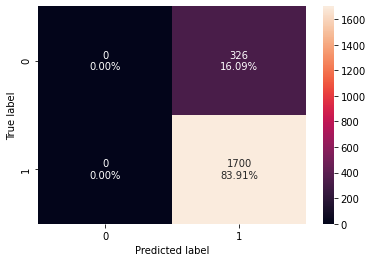

In [1391]:
#Fitting the model
bagging_estimator_tuned2 = BaggingClassifier(random_state=1, n_estimators = 40, max_samples = 0.7, max_features = 1)
bagging_estimator_tuned2.fit(X_train, y_train)

#Calculating different metrics
bagging_estimator_tuned2_classifier_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned2, X_train,y_train)
print("Training performance:\n", bagging_estimator_tuned2_classifier_model_train_perf)
bagging_estimator_tuned2_classifier_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned2, X_test, y_test)
print("Test performance:\n",bagging_estimator_tuned2_classifier_model_test_perf)
bagging_estimator_tuned2_classifier_model_val_perf=model_performance_classification_sklearn(bagging_estimator_tuned2, X_val, y_val)
print("Validation performance:\n",bagging_estimator_tuned2_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned2, X_val, y_val)

- Overall model performance decreased for accuracy and precision after tuning the model
- The recall for all three models is 1.0 which is unusual; this will likely not be our final model

## Hyperparameter Tuning AdaBoost Classifier

In [1392]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=abc_tuned,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 20, 'learning_rate': 0.5, 'base_estimator': DecisionTreeClassifier(max_depth=1)} with CV score=0.9868600511843599:


Training performance:
    Accuracy    Recall  Precision        F1
0  0.931358  0.988821   0.933358  0.960289
Test performance:
    Accuracy    Recall  Precision        F1
0  0.923495  0.989418   0.924725  0.955978
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.922014  0.988824   0.923626  0.955114


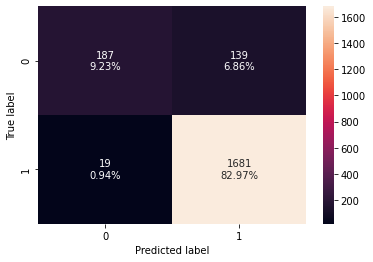

In [1393]:
#Fitting the model
abc_tuned = AdaBoostClassifier(random_state=1, n_estimators = 20,  base_estimator = DecisionTreeClassifier(max_depth=1), learning_rate = 0.5)
abc_tuned.fit(X_train, y_train)

#Calculating different metrics
abc_tuned_classifier_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance:\n", abc_tuned_classifier_model_train_perf)
abc_tuned_classifier_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Test performance:\n",abc_tuned_classifier_model_test_perf)
abc_tuned_classifier_model_val_perf=model_performance_classification_sklearn(abc_tuned, X_val, y_val)
print("Validation performance:\n",abc_tuned_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_val, y_val)

- Overall model performance increased slightly with very good recall and accuracy
- We would potentially consider this to be our final model

## Hyperparameter Tuning Gradient Boosting Classifier

In [1394]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=gbc_tuned,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 1} with CV score=0.9892127999384248:


Training performance:
    Accuracy    Recall  Precision        F1
0  0.931029  0.992744   0.929831  0.960258
Test performance:
    Accuracy    Recall  Precision        F1
0  0.919052  0.992357    0.91789  0.953672
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.923495  0.992353   0.922362  0.956078


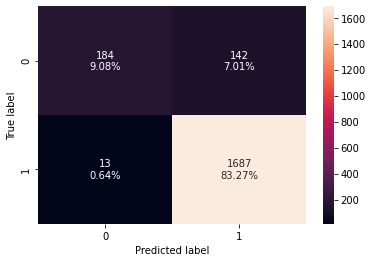

In [1395]:
#Fitting the model
gbc_tuned = GradientBoostingClassifier(random_state=1, n_estimators = 100, subsample = 1, max_features = 1)
gbc_tuned.fit(X_train, y_train)

#Calculating different metrics
gbc_tuned_classifier_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance:\n", gbc_tuned_classifier_model_train_perf)
gbc_tuned_classifier_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Test performance:\n",gbc_tuned_classifier_model_test_perf)
gbc_tuned_classifier_model_val_perf=model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
print("Validation performance:\n",gbc_tuned_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)

- Overall model performance increased slightly with very good recall and accuracy
- Accuracy and recall was very similar to the tuned AdaBoost Classifier model

In [1396]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [bagging_estimator_tuned2_classifier_model_train_perf.T, abc_tuned_classifier_model_train_perf.T, gbc_tuned_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Bagging Classifier",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier"
]
print("Tuned training performance comparison:")
models_train_comp_df

Tuned training performance comparison:


,Tuned Bagging Classifier,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier
Accuracy,0.839342,0.931358,0.931029
Recall,1.000000,0.988821,0.992744
Precision,0.839342,0.933358,0.929831
F1,0.912654,0.960289,0.960258


In [1397]:
# Test performance comparison

models_train_comp_df = pd.concat(
    [bagging_estimator_tuned2_classifier_model_test_perf.T, abc_tuned_classifier_model_test_perf.T, gbc_tuned_classifier_model_test_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Bagging Classifier",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier"
]
print("Tuned test performance comparison:")
models_train_comp_df

Tuned test performance comparison:


,Tuned Bagging Classifier,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier
Accuracy,0.839585,0.923495,0.919052
Recall,1.000000,0.989418,0.992357
Precision,0.839585,0.924725,0.917890
F1,0.912798,0.955978,0.953672


In [1398]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [bagging_estimator_tuned2_classifier_model_val_perf.T, abc_tuned_classifier_model_val_perf.T, gbc_tuned_classifier_model_val_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Bagging Classifier",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier"
]
print("Tuned validation performance comparison:")
models_train_comp_df

Tuned validation performance comparison:


,Tuned Bagging Classifier,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier
Accuracy,0.839092,0.922014,0.923495
Recall,1.000000,0.988824,0.992353
Precision,0.839092,0.923626,0.922362
F1,0.912507,0.955114,0.956078


- Overall performance of all three models were very good.
- The tuned bagging classifier had overall the lowest performance but a validation recall of ~1.00.
- Out of the three the best model that gave the best performance between AdaBoost and Gradient Boosting Classifiers is the Tuned Gradient Boosting Classifier

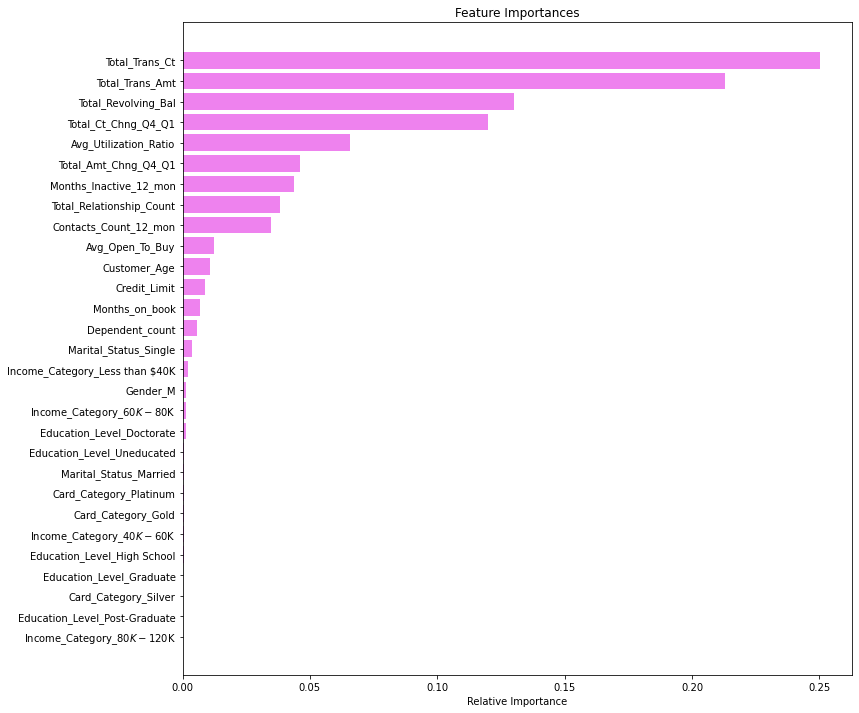

In [1399]:
feature_names = X.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Here we can see from the feature importance of our model that the transaction data and revolving balance are the three variables of highest importance of determining if a customer will renounce their credit cards.

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

In [1400]:
# creating a list of numerical variables
numerical_features = ["Customer_Age", 
                      "Dependent_count", 
                      "Months_on_book",
                      "Months_Inactive_12_mon",
                      "Total_Relationship_Count",
                      "Contacts_Count_12_mon",
                      "Total_Revolving_Bal",
                      "Avg_Open_To_Buy",
                      "Total_Amt_Chng_Q4_Q1",
                      "Total_Trans_Amt",
                      "Total_Trans_Ct",
                      "Total_Ct_Chng_Q4_Q1",
                      "Avg_Utilization_Ratio",
                      "Credit_Limit"]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [1401]:
# Separating target variable and other variables
X = data.drop("Attrition_Flag", axis=1)
Y = data["Attrition_Flag"]

In [1402]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [1403]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBC",
            GradientBoostingClassifier(
                random_state=1, 
                n_estimators = 100, 
                subsample = 1, 
                max_features = 1
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Months_Inactive_12_mon',
                                                   'Total_Relationship_Count',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                    

## Conclusion and Insights

- The best model's test recall is ~99% and the test precision is ~91%. This means that the model is good at identifying attrited customers, therefore, the bank can more accurately identify potential customers who might renounce their credit cards. 
- The model performance can be improved if wanted to improve the precision and accuracy, although both were very good at ~91% each.
- We saw in our analysis that customers who have about 40-50 transaction counts are more likely to renounce their credit cards. The bank can offer a plan that can cater to customers who will spend in this range.
- Total amount spent around 2k and 3k had the highest concetration of attrited customers. The bank can offer a lower credit limit card for customers who may be low spenders.
- We saw that customers who had a revolving balance of 0 also were more likely to renounce their credit card. The bank should be more strict on a month to month basis to flag these customers.
- Our analysis showed that customers with a lower transaction ration were more likely to renounce their credit cards. On average a ratio of ~0.4-0.5 while existing custumers have a ratio of about 0.7 The bank can alter its policies to suppress this or also monitor this as a metric for customers who might be thinking of renouncing their credit cards.